In [2]:
# import add-ons
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import numpy as np #imports
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
from scipy import stats
import netCDF4
import cmocean


In [3]:
# dataset files
dabob_filepath = 'data/Dabob_122W_48N_Jul2019_Jun2020.xlsx'
twanoh_filepath = 'data/Twanoh_123W_47N_Sep2019_Oct2020.csv'
Ndata_filepath ='data/46124o2020.txt'
Sdata_filepath = 'data/46125o2020.txt'

In [4]:
# load dabob dataset
dabob_df = pd.read_excel(dabob_filepath,header=4,usecols = (3,16))#,index_col='Date')
dabob_df['Date'] = pd.to_datetime(dabob_df['Date'])

display(dabob_df)

,Date,xCO2 SW (dry) (umol/mol)
0,2019-07-18,324.5
1,2019-07-18,357.4
2,2019-07-18,343.1
3,2019-07-18,334.2
4,2019-07-18,328.6
...,...,...
2666,2020-06-15,257.3
2667,2020-06-15,247.9
2668,2020-06-15,260.1
2669,2020-06-15,270.6


In [5]:
# load twanoh
twanoh_df = pd.read_csv(twanoh_filepath, header=4,usecols = (3,16))
twanoh_df['Date'] = pd.to_datetime(twanoh_df['Date'])

display(twanoh_df)

# calculate rolling monthly average

#twanoh_round = twanoh_df['xCO2 SW (dry) (umol/mol)'].resample('M').mean()

,Date,xCO2 SW (dry) (umol/mol)
0,2019-09-23,436.1
1,2019-09-23,490.4
2,2019-09-23,395.3
3,2019-09-23,429.8
4,2019-09-23,448.0
...,...,...
3083,2020-10-14,836.4
3084,2020-10-14,804.9
3085,2020-10-15,769.0
3086,2020-10-15,753.4


In [6]:
# rolling mean
twanoh_df['weekly_conc'] = twanoh_df['xCO2 SW (dry) (umol/mol)'].rolling(8*7).mean()
dabob_df['weekly_conc'] = dabob_df['xCO2 SW (dry) (umol/mol)'].rolling(8*7).mean()
display(twanoh_df)

,Date,xCO2 SW (dry) (umol/mol),weekly_conc
0,2019-09-23,436.1,NaN
1,2019-09-23,490.4,NaN
2,2019-09-23,395.3,NaN
3,2019-09-23,429.8,NaN
4,2019-09-23,448.0,NaN
...,...,...,...
3083,2020-10-14,836.4,707.042857
3084,2020-10-14,804.9,712.814286
3085,2020-10-15,769.0,718.128571
3086,2020-10-15,753.4,723.382143


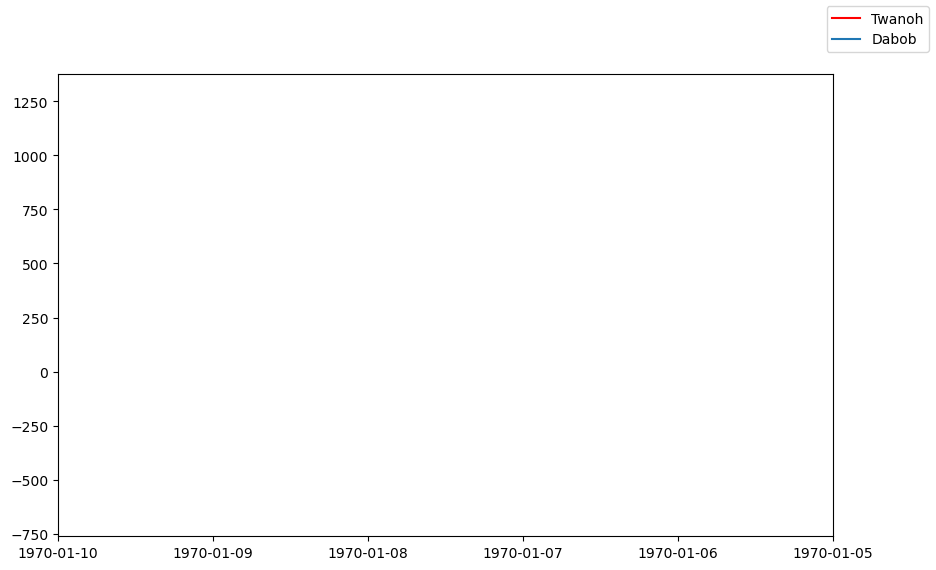

In [16]:
# plot twanoh and dabob_df
fig,axs = plt.subplots(figsize=(10,6))
#axs[0].plot(twanoh_df['Date'],twanoh_df['xCO2 SW (dry) (umol/mol)'].values,label = 'Twanoh',color = 'red')
axs.plot(twanoh_df['Date'],twanoh_df['weekly_conc'].values,label = 'Twanoh',color='red')
#axs[0].plot(dabob_df['Date'],dabob_df['xCO2 SW (dry) (umol/mol)'].values,label = 'Dabob')
axs.plot(dabob_df['Date'],dabob_df['weekly_conc'].values,label = 'Dabob')
axs.set_xlim([2019%10, 2020%6])
fig.legend()
#fig,axs = plt.subplots(figsize=(10,6))
#axs.plot(dabob_df['Date'],dabob_df['MAPCO2 %O2'])
#axs.plot(x,y2,marker='.',c='red')
#axs.set_ylabel('Oxygen')
#axs.set_xlabel('Time')
#axs.set_title('Oxygen Levels in North Hood Canal over Time')
#axs.grid()

In [ ]:
# Ndata
oxygen_Ndata = np.genfromtxt(Ndata_filepath,skip_header=2,usecols=(10)) # y axis
dates_Ndata = np.genfromtxt(Ndata_filepath,skip_header=2,usecols=(1)) # x axis (month and day)
display(dates_Ndata)
N_datadf = pd.Series(index=dates_Ndata[:,1],data=oxygen_Ndata, name = 'Oxygen')
# consolidate To 1 point per month
for latitude in round_lat:
    #find mean of temp
    mean_temps = np.mean(g5_sfl.loc[g5_sfl['round_lat']==latitude, 'OCEAN TEMP'])
    round_temps.append(mean_temps)
print(len(oxygen_Ndata))
print(len(dates_Ndata))

In [ ]:
# Sdata
oxygen_Ndata = np.genfromtxt(Sdata_filepath,skip_header=2,usecols=10) # y axis
dates_Ndata = np.genfromtxt(Sdata_filepath,skip_header=2,usecols=(1,)) # x axis (month and day)
print(len(oxygen_Ndata))
print(len(dates_Ndata))

In [ ]:
# plot North Data

fig,axs = plt.subplots(figsize=(10,6))
y=N_datadf.values
x=N_datadf.index.values
axs.plot(x,y,marker='.')
#axs.plot(x,y2,marker='.',c='red')
axs.set_ylabel('Oxygen')
axs.set_xlabel('Time')
#axs.legend()